In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
from scipy.stats import norm


## <span style="color:orange"> 10th march 2022 
  ##  <span style= "color: orange"> Numerical Simulation Laboratory: Simulation 1


## <span style="color:blue"> Exercise 1.A: testing a random numebr generator  </span>

Test of the Python random number generator, using 0 as seed: the extimators considered are the mean value and its statistical uncertainty, which will assume the values of 1/2 and 1/12, if the generator is good. The polts depict the two values as function of the number of throws. 

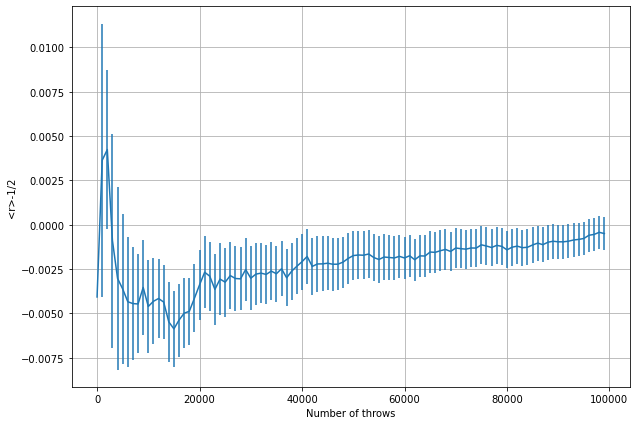

In [3]:



fig= plt.figure(figsize=(10,7))
y = np.loadtxt('myData.txt', delimiter=',', unpack=True)
x = np.loadtxt('axes.txt', delimiter=',', unpack=True)
errs = np.loadtxt('myError.txt', delimiter=',', unpack=True)
plt.errorbar(x,y-0.5,yerr=errs)
plt.xlabel('Number of throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()
        



The plot of $<r>$, rascaled by a 0.5, shows how the mean value converges to 0, as it should be expected from the theory.


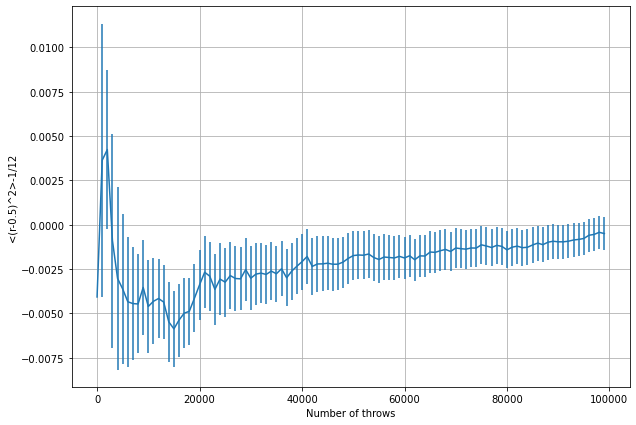

In [4]:
y = np.loadtxt('myData1.txt', delimiter=',', unpack=True)
errs = np.loadtxt('myError1.txt', delimiter=',', unpack=True)
fig= plt.figure(figsize=(10,7))
plt.errorbar(x,y-0.5,yerr=errs)
plt.xlabel('Number of throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

The plot above shows that $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$ coverges to the value expected from the theory. From the analysis of $<r>$ and $\sigma^2$ it is resonable to say that the generator of random numbers is good.

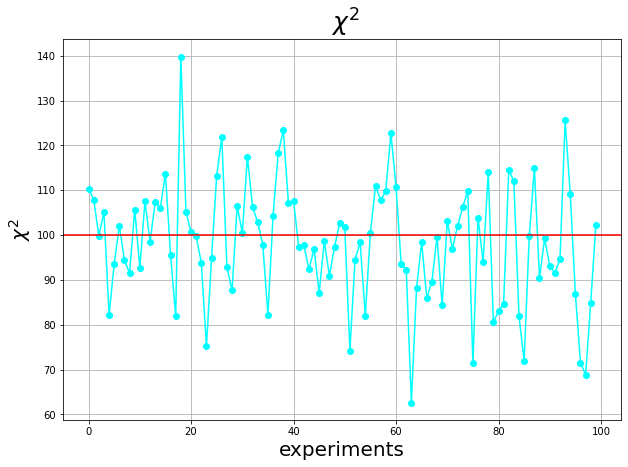

In [5]:
Chi = np.load('Chi.npy')
plt.figure(figsize=(10, 7))


tries = np.arange(100)
plt.plot(tries,Chi,marker="o", color = 'cyan')
plt.axhline(y=100,color="red")
plt.title(" $\chi^2$", fontsize = 25)
plt.xlabel("experiments", fontsize = 20)
plt.ylabel("$\chi^2$", fontsize = 20)
plt.grid(True)


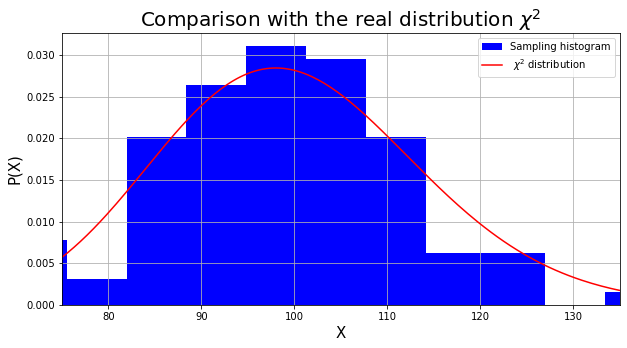

In [6]:
plt.figure(figsize=(10,5))
x = np.linspace(70,140,201)
def showDistribution(d1, tTxt, xTxt, yTxt, xmin, xmax, color):
    '''Utility function to show the distributions, and add labels and title.'''
    plt.plot(x, d1.pdf(x), color=color, label = " $\chi^2$ distribution")
    plt.xlim(xmin, xmax)
    plt.title(tTxt, fontsize = 20)
    plt.xlabel(xTxt, fontsize = 15)
    plt.ylabel(yTxt, fontsize = 15)
    plt.legend(loc = "best")
    plt.grid(True)
    plt.show()  
    

plt.hist(Chi, bins = 'auto', density = True, histtype = 'stepfilled', color = 'blue', label = "Sampling histogram")
k=100
chi=stats.chi2(k)
showDistribution(chi,'Comparison with the real distribution 'r"$\chi^2$", 'X', 'P(X)', 75 ,135, 'red')

plt.show()

By looking at the plot above we can conclude that the distribution we are sampling from is indeed uniform. 

## <span style="color:red"> Exercise 1.B: Buffon's Experiment  </span>

Thanks to Buffon's experiment is possible to obtain an estimate of $\pi$, given the probability (frequentist interpretation) that a needle of leght $L$, thrown randomly on a square with vertical lines placed at an equal distance $d$, such that $d>L$, intersects the lines that form the grid.
For this simulation a $2X2$ square, on which there is a grid realized with vertical lines at a distance of 0.01 and the needle has $L=0.5\cdot d$.
The extimate of $\pi$ is given by
$$\pi = \frac{2L}{Pd} = \lim_{N_{tot} \to \infty}\frac{2LN_{tot}}{N_{success}d}$$
The following plots depict the estimate of $\pi$ using the data blocking technique as a function of the number of blocks.
From the first graph we can see that the extimation for the real value of $\pi$ is approached, and the value found through the simulation is close to the real one: their distance is about $\sim 1 \cdot \sigma$.
The extimation for the real value of $\pi$ has been realized using its definion as half the ratio between the unitary circumference and its  radius.

In [7]:
# define reference value for the real value of pi

angles = np.linspace(-np.pi, np.pi, 10000)
n = len(angles)
circ = 0
for i in range(n-1):
    step = np.power((np.cos(angles[i+1]) - np.cos(angles[i])),2) + np.power((np.sin(angles[i+1]) - np.sin(angles[i])),2) 
    circ += np.sqrt(step)

pi_ext = 0.5*circ
print('This is the extimation for pi: ', pi_ext)

This is the extimation for pi:  3.141592601902722


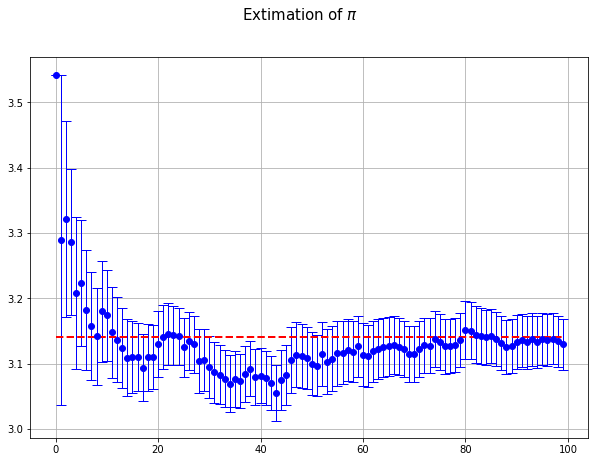

In [9]:
y1 = np.load('Pi.npy')
x = np.arange(len(y1))
err1 = np.load('Error_Pi.npy')

fig,ax1 = plt.subplots( figsize=(10,7))
fig.suptitle('Extimation of $\pi$',fontsize=15)
ax1.errorbar(x,y1,yerr=err1, fmt = "bo", capsize = 5, elinewidth = 1, label=" Simulation Result")

ax1.plot(x,pi_ext*np.ones(len(y1)), 'r--', linewidth=2, label="Reference Value")
ax1.grid('True')



## <span style="color:purple"> Exercise 1.C: Central limit Theorem  </span>

In the third part of the exercise I will try to test the central limit theorem, considering the random variable $S_{N}=\sum_{i=1}^{N} x_{i}$, where $x_{i}$ are extracted from an exponential and a Lorentz-Cauchy distribution. Two dice will be realized, and, considering 100 throws, two histograms will be filled and they will be compared with a standard dice.

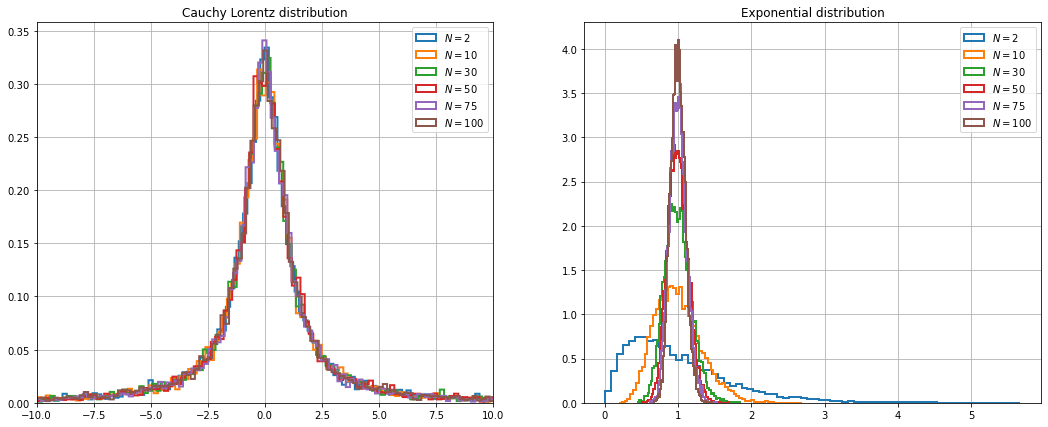

In [10]:
from scipy import stats
from scipy.stats import norm

exponential=np.load('exp_vect.npy')
cauchy= np.load('cauchy_vect.npy')
Dice = np.load('Dice_vect.npy')

figure, (ax1,ax2) = plt.subplots(1,2,figsize=(18,7))
ax1.set_title('Cauchy Lorentz distribution')
ax1.hist(cauchy[0,:], bins='auto', density = True, label='$N=2$', histtype = 'step', linewidth=2)
ax1.hist(cauchy[1,:], bins='auto', density = True, label='$N=10$', histtype = 'step', linewidth=2)
ax1.hist(cauchy[2,:], bins='auto', density = True, label='$N=30$', histtype = 'step', linewidth=2)
ax1.hist(cauchy[3,:], bins='auto', density = True, label='$N=50$', histtype = 'step', linewidth=2)
ax1.hist(cauchy[4,:], bins='auto', density = True, label='$N=75$', histtype = 'step', linewidth=2)
ax1.hist(cauchy[5,:], bins='auto', density = True, label='$N=100$', histtype = 'step', linewidth=2)
ax1.legend()
ax1.set_xlim([-10,10])
ax1.grid('True')


plt.title('Exponential distribution')
ax2.hist(exponential[0,:], bins='auto', density = True, label='$N=2$', histtype = 'step', linewidth=2)
ax2.hist(exponential[1,:], bins='auto', density = True, label='$N=10$', histtype = 'step', linewidth=2)
ax2.hist(exponential[2,:], bins='auto', density = True, label='$N=30$', histtype = 'step', linewidth=2)
ax2.hist(exponential[3,:], bins='auto', density = True, label='$N=50$', histtype = 'step', linewidth=2)
ax2.hist(exponential[4,:], bins='auto', density = True, label='$N=75$', histtype = 'step', linewidth=2)
ax2.hist(exponential[5,:], bins='auto', density = True, label='$N=100$', histtype = 'step', linewidth=2)

plt.legend()
plt.grid('True')



    



Gaussian fit parameters for the exponential distribution with N=100:
mu =  0.9984751781217507
sigma =  0.09983617312153381


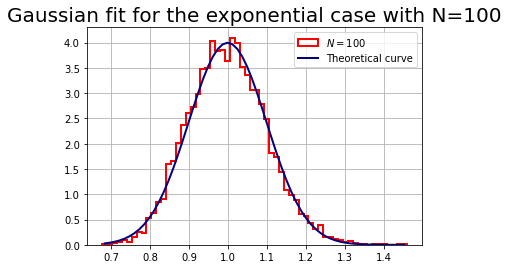



C-L fit parameters for the C-L distribution with N=100:
mu =  0.011226055307299811
gamma =  1.012267317100425


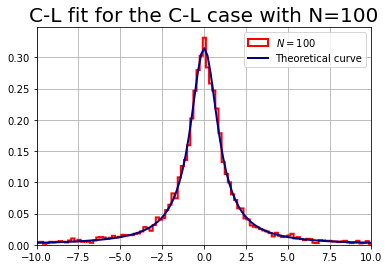

In [11]:
# Gaussian and Cauchy_Lorentz fit for the case N=100

heights, xdata= np.histogram(exponential[5,:], bins='auto')
x_vect= np.zeros(len(xdata)-1)
for i in range(len(xdata)-1):
    x_vect[i]= 0.5*(xdata[i]+xdata[i+1])
    
    


#histrogram for N=100 exponential case
plt.hist(exponential[5,:], bins='auto', density = True, label='$N=100$', histtype = 'step', linewidth=2, color = "red")
plt.title('Gaussian fit for the exponential case with N=100', fontsize = 20)

#Gaussian fit
mu, sigma = stats.norm.fit(exponential[5,:])
fit = stats.norm.pdf(x_vect, mu, sigma)
plt.plot(x_vect, fit, linewidth = 2, color = 'navy', label = "Theoretical curve")
plt.legend(loc = "best")
print("\n")
print("Gaussian fit parameters for the exponential distribution with N=100:")
print("mu = ", mu)
print("sigma = ", sigma)


plt.grid('True')
plt.show()



heights, xdata= np.histogram(cauchy[5,:], bins='auto')
x_vect= np.zeros(len(xdata)-1)
for i in range(len(xdata)-1):
    x_vect[i]= 0.5*(xdata[i]+xdata[i+1])
    
    


#histrogram for N=100 C-L case
plt.hist(cauchy[5,:], bins='auto', density = True, label='$N=100$', histtype = 'step', linewidth=2, color = "red")
plt.title('C-L fit for the C-L case with N=100', fontsize = 20)

#C-L fit 
mu, gamma = stats.cauchy.fit(cauchy[5,:])
fit = stats.cauchy.pdf(x_vect, mu, gamma)
plt.plot(x_vect, fit, linewidth = 2, color = 'navy', label = "Theoretical curve")
plt.legend(loc = "best")
plt.xlim([-10,10])
print("\n")
print("C-L fit parameters for the C-L distribution with N=100:")
print("mu = ", mu)
print("gamma = ", gamma)


plt.grid('True')
plt.show()






Gaussian fit parameters for the uniform distribution with N=100:
mu =  3.500255
sigma =  0.17249395634340353


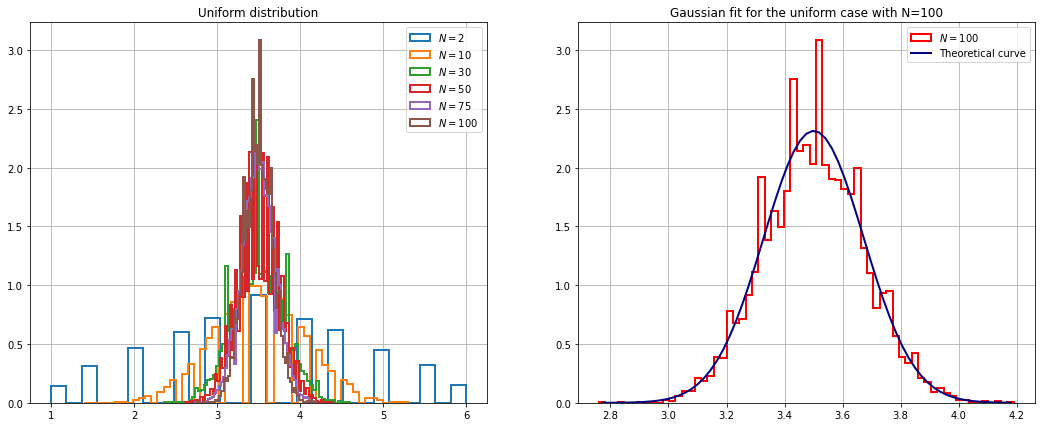

In [12]:
# standard dice: uniform distribution



figure, (ax3,ax4) = plt.subplots(1,2,figsize=(18,7))
ax3.set_title('Uniform distribution')
ax3.hist(Dice[0,:], bins='auto', density = True, label='$N=2$', histtype = 'step', linewidth=2)
ax3.hist(Dice[1,:], bins='auto', density = True, label='$N=10$', histtype = 'step', linewidth=2)
ax3.hist(Dice[2,:], bins='auto', density = True, label='$N=30$', histtype = 'step', linewidth=2)
ax3.hist(Dice[3,:], bins='auto', density = True, label='$N=50$', histtype = 'step', linewidth=2)
ax3.hist(Dice[4,:], bins='auto', density = True, label='$N=75$', histtype = 'step', linewidth=2)
ax3.hist(Dice[5,:], bins='auto', density = True, label='$N=100$', histtype = 'step', linewidth=2)
ax3.legend()
ax3.grid('True')

heights, xdata= np.histogram(Dice[5,:], bins='auto')
x_vect= np.zeros(len(xdata)-1)
for i in range(len(xdata)-1):
    x_vect[i]= 0.5*(xdata[i]+xdata[i+1])
    
    


#histrogram for N=100 exponential case
ax4.hist(Dice[5,:], bins='auto', density = True, label='$N=100$', histtype = 'step', linewidth=2, color = "red")
ax4.set_title('Gaussian fit for the uniform case with N=100')

#Gaussian fit
mu, sigma = stats.norm.fit(Dice[5,:])
fit = stats.norm.pdf(x_vect, mu, sigma)
ax4.plot(x_vect, fit, linewidth = 2, color = 'navy', label = "Theoretical curve")
ax4.legend(loc = "best")
print("\n")
print("Gaussian fit parameters for the uniform distribution with N=100:")
print("mu = ", mu)
print("sigma = ", sigma)


ax4.grid('True')


By looking at the graphs we can see that by increasing N, the $S_{N}$ obtained by sampling a uniform and exponential distribution converges to a Gaussian. On the other and the $S_{N}$ realized by sampling from a Cauchy_lLorentz distribution does not satisfy the Central Limit Theorem hypotheses, therefore, it cannot be fitted with  a Gaussian function.